In [1]:
#VISUALIZING CHANGE IN CAD EXCHANGE RATES AND SP-TSX60 DATA IN THE LAST 5 YEARS - WAZARAT HUSSAIN 
import plotly.express as px
import pandas as pd
from pathlib import Path
import numpy as np
import matplotlib as plt

# import the pathlib and csv library 
from pathlib import Path 
import csv


In [2]:
# Read/CLEAN/MASSAGE CAD DATA
CAD_data = pd.read_csv(Path("../../../02-Data/Clean Data/Market Data/CAD_5yr_cln.csv"))
CAD_data.head()

,Date,Close
0,2015-11-02,0.7632
1,2015-11-03,0.7652
2,2015-11-04,0.7601
3,2015-11-05,0.7591
4,2015-11-06,0.7515


In [3]:
# Check For Nulls
CAD_data.isnull().sum()

Date     0
Close    0
dtype: int64

In [4]:
# Set Datetime
CAD_data['Date'] = pd.to_datetime(CAD_data['Date'])
# Set Datetime to index
CAD_data = CAD_data.set_index('Date')
# Sort index
CAD_data = CAD_data.sort_index(ascending=True)

In [5]:
CAD_data.head()

,Close
Date,
2015-11-02,0.7632
2015-11-03,0.7652
2015-11-04,0.7601
2015-11-05,0.7591
2015-11-06,0.7515


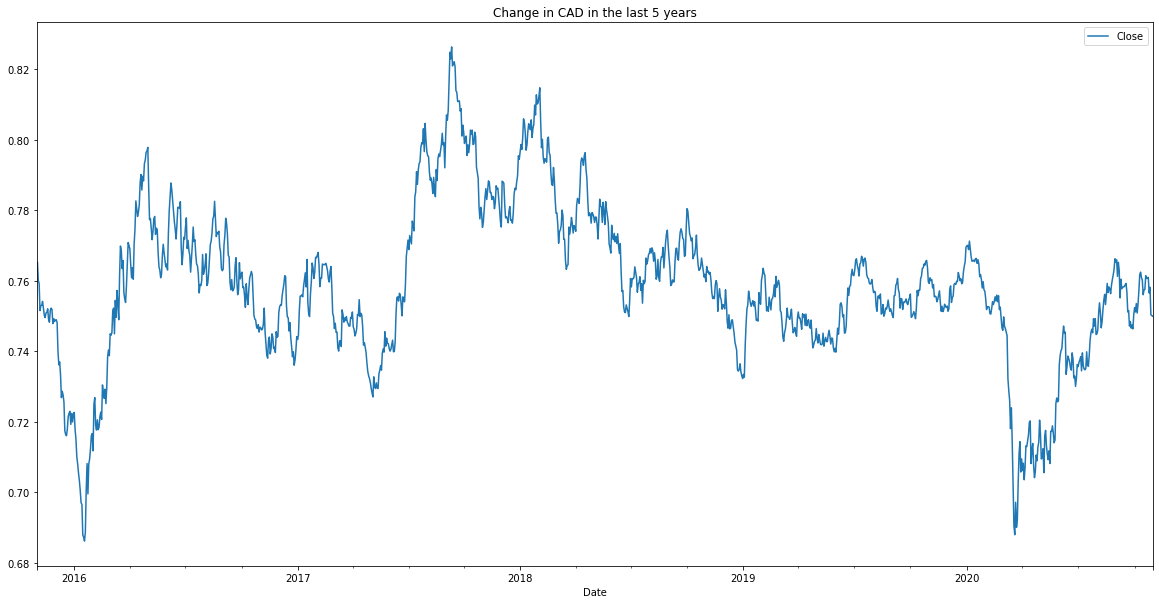

In [6]:
#PLOT CAD PRICES
CAD_data.plot(figsize=(20,10), title="Change in CAD in the last 5 years")

In [7]:
# Read in SP_TSX60_5yrs data
SP_data = pd.read_csv(Path("../../../02-Data/Clean Data/Market Data/SPTSX60_5yr_cln.csv"), thousands=',')
SP_data.head()

,Date,Price
0,2020-10-30,928.90
1,2020-10-29,934.83
2,2020-10-28,930.90
3,2020-10-27,954.81
4,2020-10-26,959.91


In [8]:
SP_data.isnull().sum()

Date     0
Price    0
dtype: int64

In [9]:
SP_data['Date'] = pd.to_datetime(SP_data['Date'])
SP_data = SP_data.set_index('Date')
SP_data = SP_data.sort_index(ascending=True)

SP_data.head()

,Price
Date,
2015-11-02,800.44
2015-11-03,804.91
2015-11-04,802.92
2015-11-05,794.97
2015-11-06,795.18


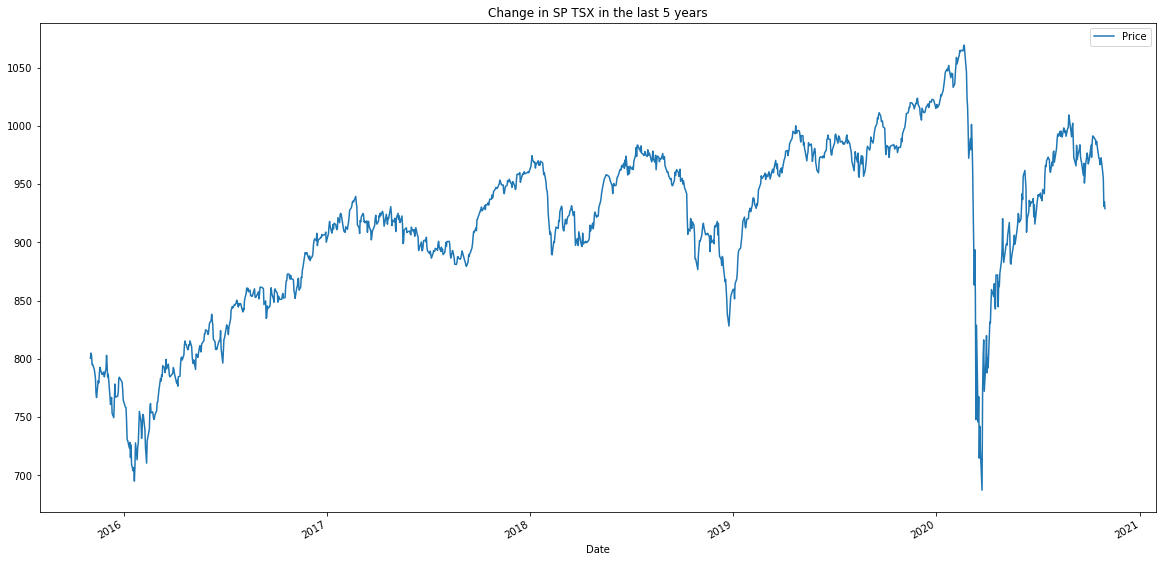

In [10]:
#PLOT SPTSX PRICES
SP_data.plot(figsize=(20,10), title="Change in SP TSX in the last 5 years")

In [11]:
 # Use the `concat` function to combine the two DataFrames by matching indexes 
combined_df = pd.concat([SP_data, CAD_data], axis="columns", join="outer")
combined_df.head()

,Price,Close
Date,,
2015-11-02,800.44,0.7632
2015-11-03,804.91,0.7652
2015-11-04,802.92,0.7601
2015-11-05,794.97,0.7591
2015-11-06,795.18,0.7515


In [12]:
combined_df.isnull().sum()

Price    50
Close     0
dtype: int64

In [13]:
combined_df = combined_df.dropna()

In [14]:
combined_df.isnull().sum()

Price    0
Close    0
dtype: int64

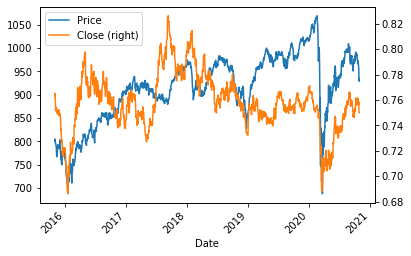

In [15]:
#THIS FUNCTION WILL SHOW THE FLUCTUATIONS OF BOTH DATAFRAMES TOGETHER 
#SINCE THE CLOSING PRICES ARE VERY DIFFERENT, WE CAN SEE THE Y AXIS FOR SP-TSX ON THE LEFT AND FOR CAD ON THE RIGHT 
combined_df[['Price','Close']].plot(secondary_y = 'Close', rot=45)